# ENGS 93 HW 3
## Cameron Wolfe 1/31/24

In [7]:
import numpy as np
from scipy.stats import norm, t, chi2
import matplotlib.pyplot as plt
from math import sqrt

## Question 1
[3 points] Temperature transducers of a certain type are shipped in batches of 50. A sample of 60 batches was selected, and the number of transducers in each batch not conforming to design specifications was determined

In [8]:
q_1_file = open("datafiles/q1.dat", "r")
q_1_dat = [int(x) for x in q_1_file.read().split(",")]
num_data_points = len(q_1_dat)

### a.
[1 point] Determine frequencies and relative frequencies for the observed values of the number of nonconforming transducers in a batch

In [9]:
frequency_dict = {}
for val in q_1_dat:
    if val in frequency_dict:
        frequency_dict[val] += 1
    else:
        frequency_dict[val] = 1
sorted_items = sorted(frequency_dict.items())
sorted_frequencies = {}
sorted_relative_frequencies = {}
for key, value in sorted_items:
    sorted_frequencies[key] = value
    sorted_relative_frequencies[key] = value / num_data_points
print("Frequencies:\n", sorted_frequencies)
print("Relative Frequencies:\n", sorted_relative_frequencies)

Frequencies:
 {0: 6, 1: 13, 2: 13, 3: 14, 4: 7, 5: 2, 6: 2, 7: 2, 8: 1}
Relative Frequencies:
 {0: 0.1, 1: 0.21666666666666667, 2: 0.21666666666666667, 3: 0.23333333333333334, 4: 0.11666666666666667, 5: 0.03333333333333333, 6: 0.03333333333333333, 7: 0.03333333333333333, 8: 0.016666666666666666}


### b.
[0.5 points] What proportion of batches in the sample have at most five nonconforming transducers? What proportion have fewer than five? What proportion have at least five nonconforming units?

In [10]:
at_most_5 = 0
less_than_5 = 0
more_than_5 = 0
for key, value in sorted_items:
    if key < 5:
        at_most_5 += value
        less_than_5 += value
    elif key == 5:
        at_most_5 += value
    else:
        more_than_5 += value
print(
    "Proportion of batches with at most 5 nonconforming transducers:\n",
    at_most_5 / num_data_points,
)
print(
    "Proportion of batches with less than 5 nonconforming transducers:\n",
    less_than_5 / num_data_points,
)
print(
    "Proportion of batches with more than 5 nonconforming transducers:\n",
    more_than_5 / num_data_points,
)

Proportion of batches with at most 5 nonconforming transducers:
 0.9166666666666666
Proportion of batches with less than 5 nonconforming transducers:
 0.8833333333333333
Proportion of batches with more than 5 nonconforming transducers:
 0.08333333333333333


### c.
[1 point] Generate a histogram of the data using relative frequency on the vertical scale

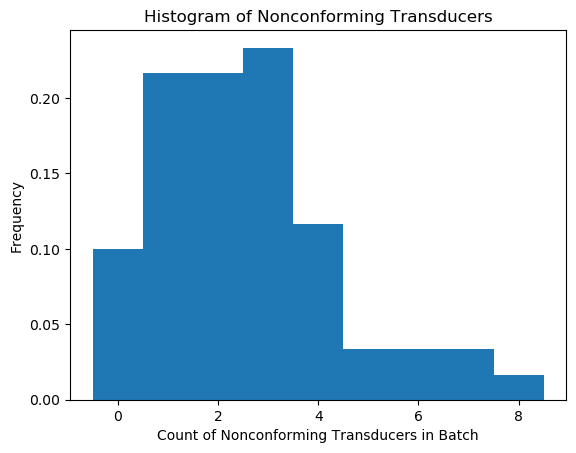

In [11]:
q_1_np = np.array(q_1_dat, dtype=int)
bins = np.array(list(range(max(q_1_dat) + 2))) - 0.5
plt.hist(q_1_np, bins=bins, weights=np.zeros_like(q_1_np) + 1 / len(q_1_np))
plt.title("Histogram of Nonconforming Transducers")
plt.xlabel("Count of Nonconforming Transducers in Batch")
plt.ylabel("Frequency")
plt.show()

### d.
[0.5 points] Comment on the central tendency and shape of the histogram in c.

This appears to be a binomial distribution centered around 2 or 3 transducers.


## Question 2
[2 points] The nine measurements that follow are furnace temperatures recorded on successive batches in a semiconductor manufacturing process (units are !F): 953, 950, 948, 955, 951, 949, 957, 954, 955

In [12]:
q_2_file = open("datafiles/q2.dat")
q_2_dat = [int(x) for x in q_2_file.read().split(",")]
q_2_np = np.array(q_2_dat)

### a.
[0.5 points] Calculate the sample mean, sample variance, and standard deviation

In [13]:
sample_mean = q_2_np.mean()
sample_std = np.std(q_2_np, ddof=1)
sample_var = sample_std**2
print(
    "Sample mean:",
    sample_mean,
    "\nSample variance:",
    sample_var,
    "\nSample std:",
    sample_std,
)

Sample mean: 952.4444444444445 
Sample variance: 9.52777777777778 
Sample std: 3.0867098629086893


### b.
[0.5 points] Find the median. How much could the largest temperature measurement increase without changing the median value?

In [14]:
def find_median(data_arr):
    sorted_arr = sorted(data_arr)
    while len(sorted_arr) > 2:
        sorted_arr = sorted_arr[1:-1]

    if len(sorted_arr) == 2:
        return (sorted_arr[0] + sorted_arr[1]) / 2.0
    else:
        return sorted_arr[0]

print("Median:", find_median(q_2_dat))

Median: 953


The largest temperature measurement could increase indefinitly and not increase the median.

### c.
[1 point] Construct a box plot of the data.

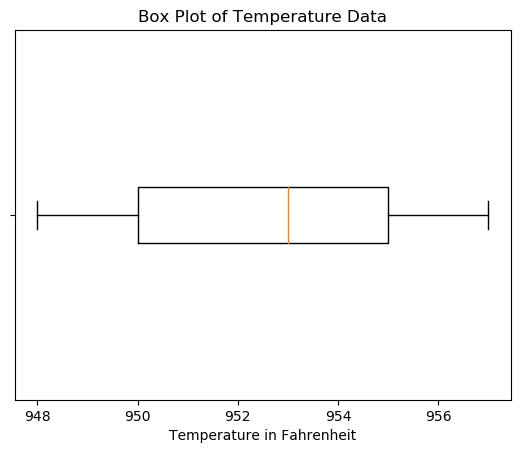

In [15]:
plt.boxplot(q_2_np, vert=False, labels=[""])
plt.title("Box Plot of Temperature Data")
plt.xlabel("Temperature in Fahrenheit")
plt.show()

## Question 3
[2 points] Suppose you collected the following data on the oxide layer thickness of a particular semiconductor during an electrical circuits class at Thayer.

In [16]:
q_3_file = open("datafiles/q3.dat", "r")
q_3_dat = [int(x) for x in q_3_file.read().split(",")]
q_3_np = np.array(q_3_dat)

### a.
[0.5 points] Calculate a point estimate of the mean oxide layer thickness for all wafers in the population.

In [17]:
sample_mean = q_3_np.mean()
print("Sample mean:", sample_mean)

Sample mean: 423.3333333333333


### b.
[0.5 points] Calculate the standard error of the point estimate from part (a). Provide an interpretation of the standard error

In [18]:
sample_std = np.std(q_3_np, ddof=1)
print("Standard error:", sample_std)

Standard error: 9.08255215361786


Standard error is an estimation of the standard deviation of the population.

### c.
[0.5 points] Calculate a point estimate of the median oxide layer thickness for all wafers in the population.

In [19]:
print("Median:", find_median(q_3_dat))

Median: 424.0


### d.
[0.5 points] Calculate a point estimate of the proportion of wafers in the population that have layer oxide thickness greater than 430 units

In [20]:
print("Proportion greater than 430:", len(q_3_np[q_3_np > 430]) / len(q_3_np))

Proportion greater than 430: 0.2916666666666667


## Question 4
[2 points] A study was conducted to determine the average weight of a new species of fish that has recently been discovered. A sample of 20 fish was randomly selected from a large population of these fish and weighed.

In [21]:
q_4_file = open("datafiles/q4.dat", "r")
q_4_dat = [int(x) for x in q_4_file.read().split(",")]
q_4_np = np.array(q_4_dat)

### a.
[0.5 points] Calculate the sample mean weight of the fish.

In [22]:
sample_mean = q_4_np.mean()
print("Sample mean:", sample_mean)

Sample mean: 573.55


### b.
[0.5 points] Calculate the standard error of the sample mean weight.

In [23]:
sample_std = np.std(q_4_np, ddof=1)
print("Standard error:", sample_std)

Standard error: 7.701503612590002


### c.
[1 point] Discuss the implications of reducing the sample size on point estimation.

By reducing the sample size, you reduce the accuracy of point estimates.  The sample mean is less likely to be close to the population mean, and the standard error is likely to be smaller than the true population standard deviation.

## Question 5
[1.5 point] The following data present motor fuel octane ratings of gasoline blends.  Construct a normal probability plot of the data. Does it seem reasonable to assume that octane rating is normally distributed? If not, what kind of behavior is the data exhibiting?

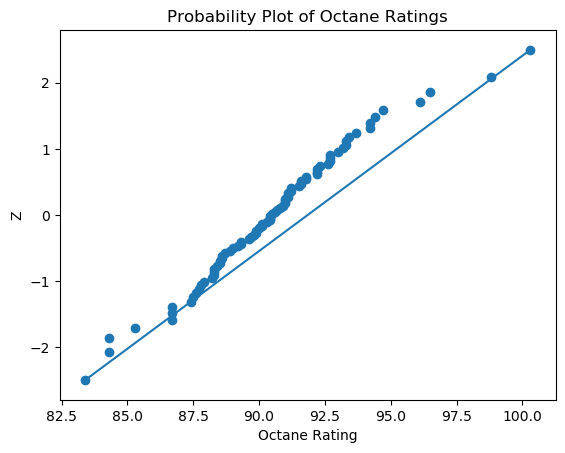

In [24]:
q_5_file = open("datafiles/q5.dat", "r")
q_5_dat = sorted([float(x) for x in q_5_file.read().split(",")])
q_5_np = np.array(q_5_dat)
n = len(q_5_dat)
ppf = np.zeros(n, dtype=float)
z = np.zeros(n, dtype=float)
for i in range(n):
    ppf[i] = (i + 0.5) / n
    z[i] = norm.ppf(ppf[i])

plt.plot(q_5_np[[0, -1]], z[[0, -1]])
plt.scatter(q_5_np, z)
plt.title("Probability Plot of Octane Ratings")
plt.xlabel("Octane Rating")
plt.ylabel("Z")
plt.show()

It appears to be normally distributed, although slightly shifted to the left.

## Question 6
[2 points] A recent research study found that the mean age of smartphone users is 34 years with a standard deviation of 15 years. Suppose you took a sample of 100 people in the Upper Valley to confirm these results.

### a.
[0.5 points] What are the mean and standard deviation for the sample mean ages of smartphone users?

In [25]:
pop_mean = 34
pop_std = 15
n = 100
sample_std = 15 / sqrt(n)
print("Mean:", pop_mean)
print("Standard deviation:", sample_std)

Mean: 34
Standard deviation: 1.5


### b.
[0.5 points] What does the distribution of the sample mean age of smartphone users should look like?

The distribution of the sample mean of smartphone user's aage should also be a normal distribution.

### c.
[0.5 points] Find the probability that the sample mean age is more than 30 years.

In [26]:
z = (30 - pop_mean) / sample_std
prob = 1 - norm.cdf(z)
print("Probability that sample mean is greater than 30:", prob)

Probability that sample mean is greater than 30: 0.9961696194324102


### d.
[0.5 points] Find the 95th percentile for the sample mean age (to one decimal place)

In [27]:
z = norm.ppf(0.95)
sample_mean_95 = z * sample_std + pop_mean
print("95th percentile for sample mean age:", sample_mean_95)

95th percentile for sample mean age: 36.46728044042721


## Question 7
[3 points] We collected a sample from the scores of the first quiz of our class: 76, 78, 80, 82, 84. The sample standard deviation is $s = 3.16$. We assume that the scores are normally distributed with unknown population mean and unknown population variance.

In [28]:
q_7_dat = [76, 78, 80, 82, 84]
n = len(q_7_dat)
q_7_np = np.array(q_7_dat)

### a.
[0.5 points] Construct a two-sided confidence interval (CI) for the population mean score using a confidence level of 95%.

In [29]:
sample_std = np.std(q_7_np, ddof=1)
sample_mean = q_7_np.mean()
t_val = t.ppf(0.975, n - 1)
mean_ci = [
    sample_mean - t_val * sample_std / sqrt(n),
    sample_mean + t_val * sample_std / sqrt(n),
]
print("Two-sided 95% CI for population mean:", mean_ci)

Two-sided 95% CI for population mean: [76.07351367704487, 83.92648632295513]


### b.
[0.5 points] Construct a two-sided CI for the population standard deviation using a confidence level of 95%.

In [30]:
upper_chi_val = chi2.ppf(0.025, n - 1)
lower_chi_val = chi2.ppf(0.975, n - 1)
std_ci = [
    sqrt((n - 1) * sample_std**2 / lower_chi_val),
    sqrt((n - 1) * sample_std**2 / upper_chi_val),
]
print("Two-sided 95% CI for population standard deviation:", std_ci)

Two-sided 95% CI for population standard deviation: [1.8946253413504472, 9.086980786896534]


Now suppose the population standard deviation is indeed given by $\sigma = 3.16$
### c.
[0.5 points] Construct a two-sided CI for the population mean score using a confidence level of 95% for this case

In [31]:
pop_std = sample_std
z_val = norm.ppf(0.975)
mean_ci = [
    sample_mean - z_val * pop_std / sqrt(n),
    sample_mean + z_val * pop_std / sqrt(n),
]
print(
    "Two-sided 95% CI for population mean given standard deviation:",
    mean_ci,
)


Two-sided 95% CI for population mean given standard deviation: [77.22819235130065, 82.77180764869935]


### d.
[1 point] How does the CI obtained in c. compares with the CI of part a.? Why is this the case?

The confidence interval in C is tighter than in A because there is some uncertainty in the sample standard deviation from the data, meaning that in order to account for this, a wider range was needed.

### e.
[0.5 points] What is sample size necessary for the two-sided 95% CI in (c) to have a width of 2?

In [32]:
n_needed = (z_val * pop_std / 1) ** 2
print("Sample size needed for width of 95% CI to be 2:", n_needed)

Sample size needed for width of 95% CI to be 2: 38.414588206941254


## Question 8
[1.5 points] Suppose you are examining various apple trees to measure the average number of apples for each tree. You estimate that the standard deviation in the number of apples per tree is around 5 and suspect that the numbers of apples per tree is normally distributed. What is the minimum number of trees you should check so that your 90% confidence interval specifies the mean to within plus and minus 2 apples per tree?

In [33]:
sample_std = 5
z_val = norm.ppf(0.95)
n_needed = (z_val * sample_std / 2) ** 2
print("Number of trees needed for 90% CI to be +- 2:", n_needed)

Number of trees needed for 90% CI to be +- 2: 16.909646588096333


## Question 9
[1.5 points] A sample weights of 225 manufactured products have a reported mean of 35kg, with a 95% confidence interval of (34.64, 35.37) kg. Assuming that the population is normally distributed and true population variance is unknown, what is the sample variance?

In [34]:
mean_ci = [34.64, 35.37]
n = 225
t_val = t.ppf(0.975, n - 1)
sample_std = (mean_ci[1] - (mean_ci[0] + mean_ci[1]) / 2) * sqrt(n) / t_val
print("Sample standard deviation:", sample_std)

Sample standard deviation: 2.7783261679113616


## Question 10
[1.5 points] The mean water temperature downstream from a power plant cooling tower discharge pipe should be no more than 100°F. Past experience has indicated that the standard deviation of temperature is 2°F. The water temperature is measured on nine randomly chosen days, and the average temperature is found to be 98°F.

### a.
[0.5 points] If a hypothesis test were to be performed on the resulting data, what null and alternative hypotheses would be of interest to the manufacturer?

Null hypotheses: The temperature being above or below the threshold is due to random variation in the measurements.
Alternative hypothesis: The temperature is above or below the threshold because of actions taken by the power plant.

### b.
[0.5 points] Describe type I error in the context of this problem situation.

A type 1 error would be if the temperature just happened to be below the threshold due the variability, whereas the true mean temperature is above the threshold, meaning that the actions taken by the plant are insufficient.

### c.
[0.5 points] Describe type II error in the context of this problem situation

A type 2 error would be if the temperature were above the threshold because of random chance, whereas the cooling system is actually working and keeps the true mean temperature below the threshold.  The actions taken by the plant are sufficient, but they do not think they are.